In [92]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and visualization
import seaborn as sns
sns.set_style("whitegrid")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes',unicode_minus=False)
from matplotlib.ticker import ScalarFormatter
from haversine import haversine

import folium
import json

from scipy.spatial import Voronoi, voronoi_plot_2d

import geopandas
import requests as rq
from bs4 import BeautifulSoup
import pprint
import xmltodict

대전 서구 등록장애인 현황 데이터 저장

In [83]:
url='https://www.seogu.go.kr/data/api/3660000/getDsPsnPopltn/getDsPsnPopltnlist'
response = requests.get(url)
content=response.content
data_dict = xmltodict.parse(content)

data=data_dict['response']['body']['items']['item']

df = pd.DataFrame(data)
df=df[['trobl_ty','adstrd','dspsn_cnt']]
df['dspsn_cnt']=df['dspsn_cnt'].astype('int64')

df=df.groupby('adstrd')['dspsn_cnt'].sum().reset_index()

df.to_csv('대전서구등록장애인.csv')

장애인 현황

In [251]:
df1=pd.read_excel('대전시군구_연령_유형별장애인인구.xlsx')
df2=pd.read_excel('대전시군구_정도_유형별장애인구수.xlsx')

In [85]:
!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [89]:
print(df1)
print(df2)

      통계시도명 통계시군구명  연령 장애유형  등록장애인수
0     대전광역시     동구   7   지체       1
1     대전광역시     동구   8   지체       1
2     대전광역시     동구  10   지체       1
3     대전광역시     동구  11   지체       1
4     대전광역시     동구  14   지체       1
...     ...    ...  ..  ...     ...
4152  대전광역시    대덕구  66  뇌전증       1
4153  대전광역시    대덕구  67  뇌전증       1
4154  대전광역시    대덕구  71  뇌전증       1
4155  대전광역시    대덕구  73  뇌전증       1
4156  대전광역시    대덕구  74  뇌전증       2

[4157 rows x 5 columns]
     통계시도명 통계시군구명   장애유형       장애정도  등록장애인수
0    대전광역시     동구     지체      심한 장애    1241
1    대전광역시     동구     시각      심한 장애     303
2    대전광역시     동구     청각      심한 장애     441
3    대전광역시     동구     언어      심한 장애      63
4    대전광역시     동구     지적      심한 장애    1439
..     ...    ...    ...        ...     ...
134  대전광역시    대덕구    호흡기  심하지 않은 장애       2
135  대전광역시    대덕구      간  심하지 않은 장애      50
136  대전광역시    대덕구     안면  심하지 않은 장애       4
137  대전광역시    대덕구  장루.요루  심하지 않은 장애      64
138  대전광역시    대덕구    뇌전증  심하지 않은 장애      33

[139 rows x 5 

In [107]:
df2

,통계시도명,통계시군구명,장애유형,장애정도,등록장애인수
0,대전광역시,동구,지체,심한 장애,1241
1,대전광역시,동구,시각,심한 장애,303
2,대전광역시,동구,청각,심한 장애,441
3,대전광역시,동구,언어,심한 장애,63
4,대전광역시,동구,지적,심한 장애,1439
...,...,...,...,...,...
134,대전광역시,대덕구,호흡기,심하지 않은 장애,2
135,대전광역시,대덕구,간,심하지 않은 장애,50
136,대전광역시,대덕구,안면,심하지 않은 장애,4
137,대전광역시,대덕구,장루.요루,심하지 않은 장애,64


In [198]:
df_deg=df2.groupby(['통계시군구명','장애정도'])['등록장애인수'].sum().reset_index().pivot(index='통계시군구명',columns='장애정도',values='등록장애인수').reset_index()

df_deg['합계']=df_deg['심하지 않은 장애']+df_deg['심한 장애']

df_deg=df_deg.sort_values(by='합계',ascending = False)

df_deg=df_deg.set_index('통계시군구명')[['심하지 않은 장애','심한 장애']]

df_deg

장애정도,심하지 않은 장애,심한 장애
통계시군구명,,
서구,12543,8035
동구,8650,5700
중구,8588,5172
유성구,7461,4888
대덕구,6426,4396


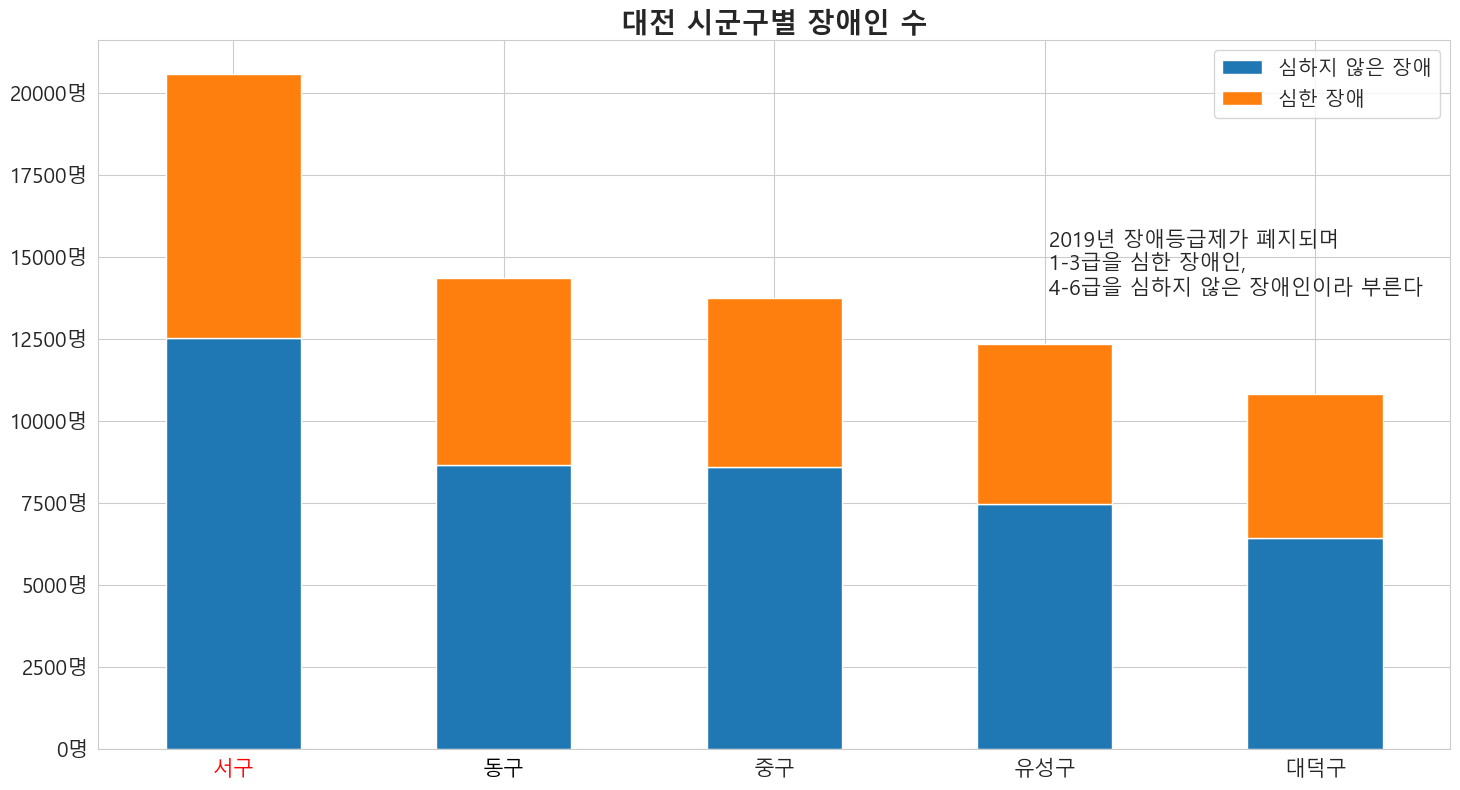

In [209]:
def person(x, pos):
    return f'{np.int64(x)}명'

fig, ax = plt.subplots(1,1, figsize = (15, 8))

df_deg.plot.bar(stacked=True,ax=ax)

ax.set_title('대전 시군구별 장애인 수',fontsize = 20, fontweight = 'bold')

ax.tick_params(labelsize=15)

for ytick, color in zip(ax.get_xticklabels(), ['red','black']):
    ytick.set_color(color)

formatter = FuncFormatter(person)

ax.yaxis.set_major_formatter(formatter)

ax.set(ylabel = None)
ax.set(xlabel = None)

ax.annotate('2019년 장애등급제가 폐지되며\n1-3급을 심한 장애인,\n4-6급을 심하지 않은 장애인이라 부른다', textcoords = 'offset points',
                xy = (3,320), fontsize = 15)

plt.xticks(rotation=0)

plt.legend(fontsize = 'x-large')
fig.tight_layout()
fig.show()

### 유형별/연령별 장애인 수

In [245]:
df2

,통계시도명,통계시군구명,장애유형,장애정도,등록장애인수
0,대전광역시,동구,지체,심한 장애,1241
1,대전광역시,동구,시각,심한 장애,303
2,대전광역시,동구,청각,심한 장애,441
3,대전광역시,동구,언어,심한 장애,63
4,대전광역시,동구,지적,심한 장애,1439
...,...,...,...,...,...
134,대전광역시,대덕구,호흡기,심하지 않은 장애,2
135,대전광역시,대덕구,간,심하지 않은 장애,50
136,대전광역시,대덕구,안면,심하지 않은 장애,4
137,대전광역시,대덕구,장루.요루,심하지 않은 장애,64


In [246]:
region_data=df2.groupby(['통계시군구명','장애유형'])['등록장애인수'].sum().reset_index()
region_data

,통계시군구명,장애유형,등록장애인수
0,대덕구,간,55
1,대덕구,뇌병변,980
2,대덕구,뇌전증,46
3,대덕구,시각,942
4,대덕구,신장,419
...,...,...,...
70,중구,정신,603
71,중구,지적,1231
72,중구,지체,6015
73,중구,청각,2037


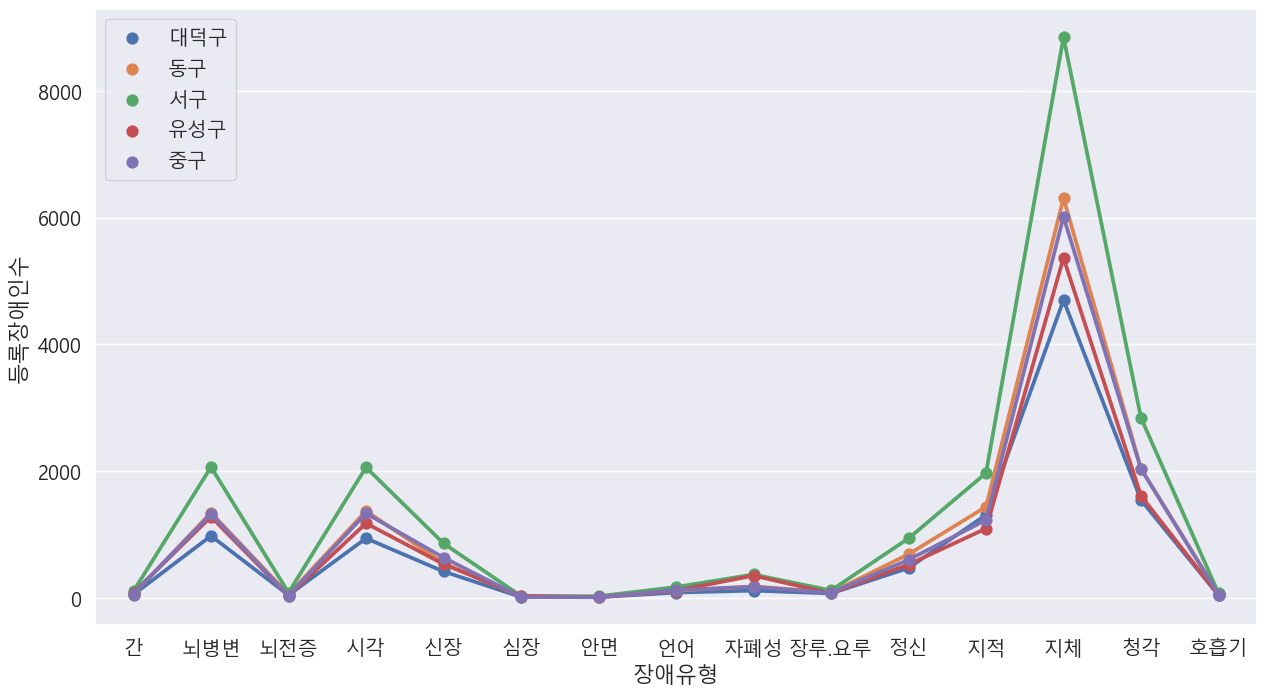

In [145]:
sns.set_style("whitegrid")
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.pointplot(x='장애유형',y='등록장애인수',hue='통계시군구명',data=region_data) #hue=열 이름을 지정하면, 해당 열의 고유값별로 그래프가 구분됩니다. 
plt.legend(loc='upper left')
plt.show()

In [248]:
disab=df2.groupby('장애유형')['등록장애인수'].sum().reset_index().sort_values(by='등록장애인수',ascending=False)
disab

,장애유형,등록장애인수
12,지체,31236
13,청각,10078
11,지적,7049
1,뇌병변,7002
3,시각,6890
10,정신,3234
4,신장,3004
8,자폐성,1202
7,언어,615
9,장루.요루,436


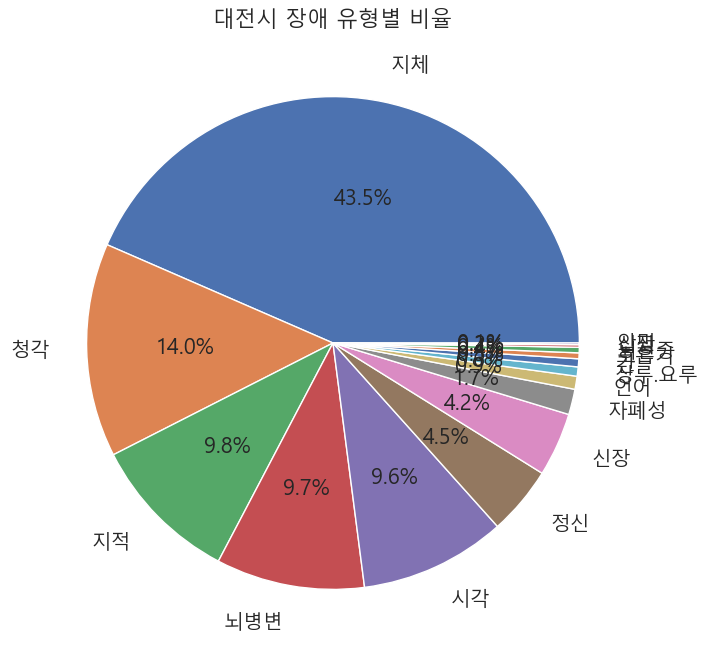

In [144]:
plt.figure(figsize=(8,8))
plt.pie(disab['등록장애인수'],labels=disab['장애유형'],autopct='%1.1f%%',labeldistance=1.15)
plt.title('대전시 장애 유형별 비율')
plt.show()

In [252]:
df1

,통계시도명,통계시군구명,연령,장애유형,등록장애인수
0,대전광역시,동구,7,지체,1
1,대전광역시,동구,8,지체,1
2,대전광역시,동구,10,지체,1
3,대전광역시,동구,11,지체,1
4,대전광역시,동구,14,지체,1
...,...,...,...,...,...
4152,대전광역시,대덕구,66,뇌전증,1
4153,대전광역시,대덕구,67,뇌전증,1
4154,대전광역시,대덕구,71,뇌전증,1
4155,대전광역시,대덕구,73,뇌전증,1


In [253]:
df1['연령대']=pd.cut(df1['연령'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, float('inf')], labels=['10대미만','10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100대 이상'])
df1=df1.loc[df1['장애유형'].isin(['지체','지적','청각','뇌병변','시각'])].reset_index()
df1

,index,통계시도명,통계시군구명,연령,장애유형,등록장애인수,연령대
0,0,대전광역시,동구,7,지체,1,10대미만
1,1,대전광역시,동구,8,지체,1,10대미만
2,2,대전광역시,동구,10,지체,1,10대
3,3,대전광역시,동구,11,지체,1,10대
4,4,대전광역시,동구,14,지체,1,10대
...,...,...,...,...,...,...,...
2223,3854,대전광역시,대덕구,94,뇌병변,2,90대
2224,3855,대전광역시,대덕구,95,뇌병변,2,90대
2225,3856,대전광역시,대덕구,96,뇌병변,2,90대
2226,3857,대전광역시,대덕구,97,뇌병변,1,90대


In [210]:
age_disab=df1.groupby(['연령대','장애유형'])['등록장애인수'].sum().reset_index()
age_disab

,연령대,장애유형,등록장애인수
0,10대미만,뇌병변,168
1,10대미만,시각,23
2,10대미만,지적,376
3,10대미만,지체,19
4,10대미만,청각,52
5,10대,뇌병변,187
6,10대,시각,57
7,10대,지적,1183
8,10대,지체,85
9,10대,청각,59


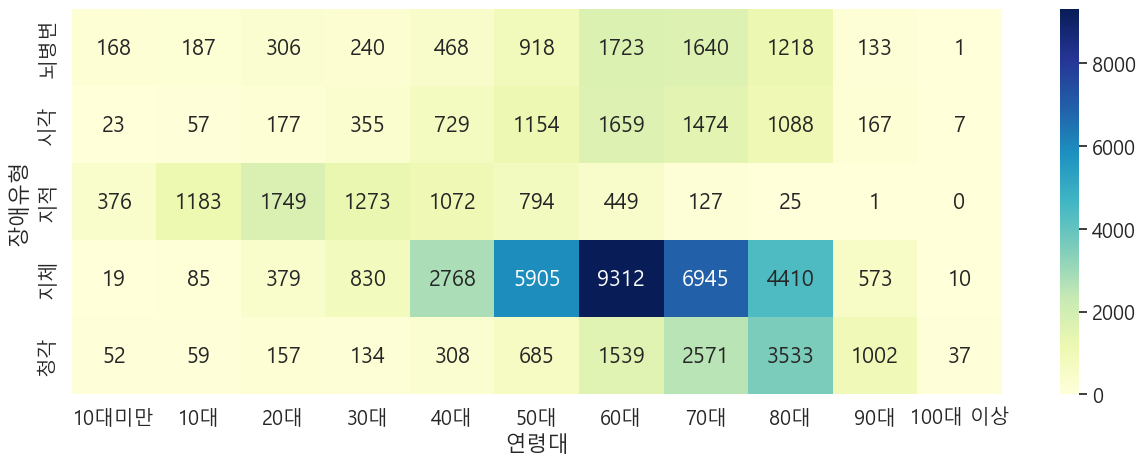

In [254]:
pivot=age_disab.pivot(index='연령대',columns='장애유형', values='등록장애인수')

plt.figure(figsize=(15,5))
sns.heatmap(pivot.T,cmap='YlGnBu',fmt='d',annot=True)
plt.show()

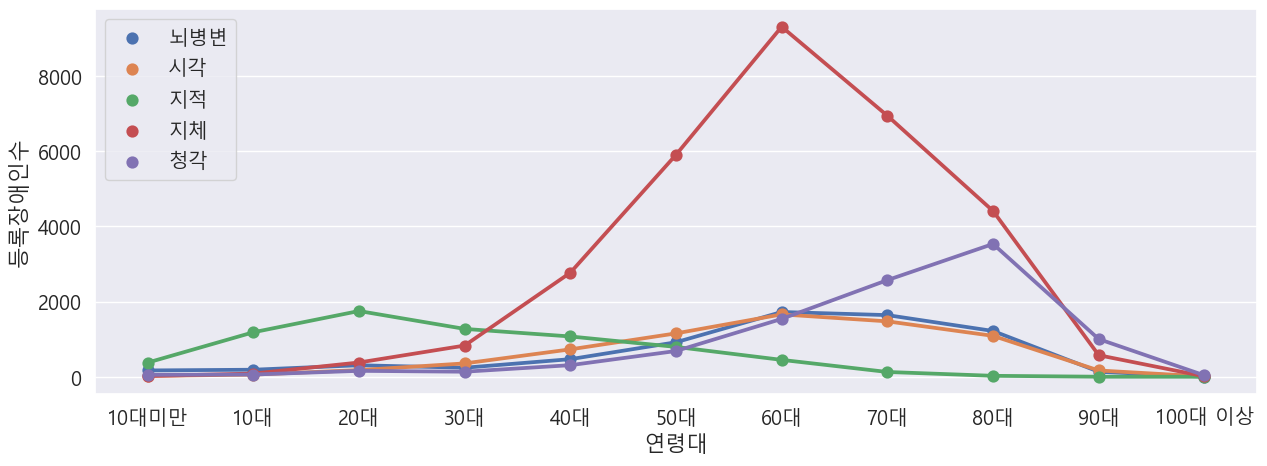

In [243]:
plt.figure(figsize=(15,5))
sns.pointplot(x='연령대',y='등록장애인수',hue='장애유형',data=age_disab)
plt.legend(loc='upper left')
plt.show()